<a href="https://colab.research.google.com/github/PedroDubas/DeepLearning_DerramePulmionar/blob/master/DL_Rx_Torax_Aula_TOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on - Deep Learning para Reconhecimento de Imagem
# Detecção de Derame Pleural em Rx de Tórax

In [0]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!unzip '/gdrive/My Drive/RxTorax.zip' -d '/content/'


Archive:  /gdrive/My Drive/RxTorax.zip
   creating: /content/dataset/
   creating: /content/dataset/normal/
 extracting: /content/dataset/normal/normal245.png  
 extracting: /content/dataset/normal/normal305.png  
 extracting: /content/dataset/normal/normal23.png  
 extracting: /content/dataset/normal/normal15.png  
 extracting: /content/dataset/normal/normal321.png  
 extracting: /content/dataset/normal/normal57.png  
 extracting: /content/dataset/normal/normal295.png  
 extracting: /content/dataset/normal/normal309.png  
 extracting: /content/dataset/normal/normal44.png  
 extracting: /content/dataset/normal/normal345.png  
 extracting: /content/dataset/normal/normal186.png  
 extracting: /content/dataset/normal/normal147.png  
 extracting: /content/dataset/normal/normal462.png  
 extracting: /content/dataset/normal/normal163.png  
 extracting: /content/dataset/normal/normal414.png  
 extracting: /content/dataset/normal/normal389.png  
 extracting: /content/dataset/normal/normal255.p

**REFERÊNCIAS:**

Utilizaremos imagens selecionadas do dataset público NIH ChestXray14.

Parte do material didático foi baseado no tutorial 
[https://github.com/llSourcell/Convolutional_neural_network](https://github.com/llSourcell/Convolutional_neural_network)



**OBJETIVO:**

Demonstrar os passos básicos do treinamento de uma rede neural convolucional para detectar fratura.


**RECURSOS:**

Todo o processo será realizado com a linguagem de programação Python, e bibliotecas como Keras, Numpy, openCV, etc...

Você verá que importaremos as bibliotecas específicas para tarefas específicas ao longo do hands-on.

#Antes de começar, vamos entender brevemente o que é uma Rede Neural Convolucional (CNN)

As CNNs são modelos inspirados na biologia do córtex visual dos mamíferos. D. H. Hubel e T. N. Wiesel  propuseram uma explicação para a maneira como os mamíferos percebem visualmente o mundo ao seu redor usando uma arquitetura em camadas de neurônios no cérebro, e isso, por sua vez, inspirou os engenheiros a tentar desenvolver mecanismos semelhantes de reconhecimento de padrões na visão computacional.

![alt text](http://blog.arimaresearch.com/wp-content/uploads/2017/01/visual_stream_small.png)
http://blog.arimaresearch.com/convolutional-neural-network-cnn/


Na hipótese deles, dentro do córtex visual, respostas funcionais complexas geradas por células mais "profundas" são construídas a partir de respostas mais simples de "células iniciais".

Por exemplo, células simples responderiam a linhas especificamente orientadas e bordas, enquanto células mais profundas também responderão a certas orientações, mas com um grau progressivo de complexidade.

Basicamente uma célula mais profunda responde a uma soma de entradas de outras células mais iniciais.

A arquitetura das redes neurais convolucionais foi inspirada nestas idéias



![alt text](https://camo.githubusercontent.com/9e6e118e373b1ca1b8b53c8a70d4baf08840d768/68747470733a2f2f7777772e6d617468776f726b732e636f6d2f636f6e74656e742f6d617468776f726b732f7777772f656e2f646973636f766572792f636f6e766f6c7574696f6e616c2d6e657572616c2d6e6574776f726b2f6a63723a636f6e74656e742f6d61696e5061727379732f696d6167655f636f70792e61646170742e66756c6c2e686967682e6a70672f313439373837363337323939332e6a7067)





# Vamos começar
# Passo 1: baixando e criando o dataset

**Dataset:**


O conjunto de dados que vamos uttilizar consiste de 500 imagens de Rx de tórax normais e 500 Rx com derrame, retiradas e selecionadas retiradas do dataset público NIH ChestXray14.

O NIH ChestXray14 contém cerca de 120.000 raio x de tórax anotados em 14 diferentes categorias.


As primeiras etapas vão baixar o dataset

siga as instruções em texto e em amarelo dentro das células

**Para executar cada célula, pressione SHIFT + ENTER**

In [0]:
import os

os.environ["PATH"]
import sys
print(sys.executable)


/usr/bin/python3


In [0]:
#Agora que ja temos as imagens baixadas, para abrir as imagens .jpg, vamos utilizar o glob, que lista os arquivos que existem dentro de uma pasta

from glob import glob

print ('\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')
  
#Para executar este código, pressione SHIFT + ENTER

Etapa Concluída. Vá para o próximo comando!


In [0]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

 3047424/26421880 [==>...........................] - ETA: 13s

KeyboardInterrupt: ignored

In [0]:
#Vamos definir o caminho das pastas que contém as imagens
derrame_dir = 'dataset/effusion/*.png'
normal_dir = 'dataset/normal/*.png'

#Agora vamos listar os arquvos dentro de cada uma das pastas, usando o glob()
derrame_lista = glob(derrame_dir)
normal_lista = glob(normal_dir)

#Para termos ideia do número de arquivos em cada pasta, vamos dar um print do tamanho da lista (len(lista)))
print('Número de casos com derrame: ', len(derrame_lista))
print('Número de casos normais: ', len(normal_lista))

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER


Número de casos com derrame:  500
Número de casos normais:  500

Etapa Concluída. Vá para o próximo comando!


In [0]:
# Para ter ideia de como é a lista de arquivos gerada pelo glob, vamos olhar a variável derrame_lista que criamos acima,
# Estaremos listando todos os casos com derrame
derrame_lista
print(*derrame_lista)

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER

dataset/effusion/effusion188.png dataset/effusion/effusion410.png dataset/effusion/effusion326.png dataset/effusion/effusion301.png dataset/effusion/effusion482.png dataset/effusion/effusion329.png dataset/effusion/effusion490.png dataset/effusion/effusion363.png dataset/effusion/effusion444.png dataset/effusion/effusion275.png dataset/effusion/effusion251.png dataset/effusion/effusion354.png dataset/effusion/effusion495.png dataset/effusion/effusion297.png dataset/effusion/effusion355.png dataset/effusion/effusion307.png dataset/effusion/effusion214.png dataset/effusion/effusion463.png dataset/effusion/effusion194.png dataset/effusion/effusion278.png dataset/effusion/effusion359.png dataset/effusion/effusion344.png dataset/effusion/effusion0.png dataset/effusion/effusion106.png dataset/effusion/effusion465.png dataset/effusion/effusion398.png dataset/effusion/effusion330.png dataset/effusion/effusion176.png dataset/effusion/effusion105.png dataset/effusion/effusion163.png dataset/effu

# Visualizando seus dados

Podemos também ver cada uma das imagens do nosso dataset. 

Vamos visualizar uma imagem com derrame

Na linha "ID_arquivo" escolha um numero entre 0 e 500 e rode a célula, pode repetir quantas vezes quiser.

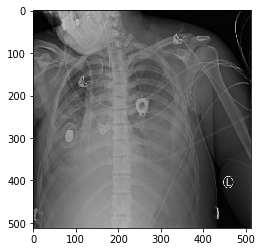


Etapa Concluída. Vá para o próximo comando!


In [0]:
#Para abrir o arquivo de imagem, utilizaremos o openCV, uma biblioteca aberta de visão computacional
#Utilizaremos uma biblioteca de plotagem de gráficos chamada a matplotlib
#!pip install opencv-python
import cv2
from matplotlib import pyplot as plt

#Escolha um numero entre 0 e 500:

ID_arquivo = 100

imagem = cv2.imread(derrame_lista[ID_arquivo])

plt.imshow(imagem) #Plota a imagem
plt.show() #Plota a imagem

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')


#Execute esse código com SHIFT + ENTER

#Pode modificar ID_arquivo com outros números para vizualizar outras imagens. Pode repetir quantas vezes quiser

In [0]:
derrame_lista

['dataset/effusion/effusion188.png',
 'dataset/effusion/effusion410.png',
 'dataset/effusion/effusion326.png',
 'dataset/effusion/effusion301.png',
 'dataset/effusion/effusion482.png',
 'dataset/effusion/effusion329.png',
 'dataset/effusion/effusion490.png',
 'dataset/effusion/effusion363.png',
 'dataset/effusion/effusion444.png',
 'dataset/effusion/effusion275.png',
 'dataset/effusion/effusion251.png',
 'dataset/effusion/effusion354.png',
 'dataset/effusion/effusion495.png',
 'dataset/effusion/effusion297.png',
 'dataset/effusion/effusion355.png',
 'dataset/effusion/effusion307.png',
 'dataset/effusion/effusion214.png',
 'dataset/effusion/effusion463.png',
 'dataset/effusion/effusion194.png',
 'dataset/effusion/effusion278.png',
 'dataset/effusion/effusion359.png',
 'dataset/effusion/effusion344.png',
 'dataset/effusion/effusion0.png',
 'dataset/effusion/effusion106.png',
 'dataset/effusion/effusion465.png',
 'dataset/effusion/effusion398.png',
 'dataset/effusion/effusion330.png',
 'd

Faça a mesma coisa, agora para visualizar um Rx de tórax normal (números de 0 a 500)

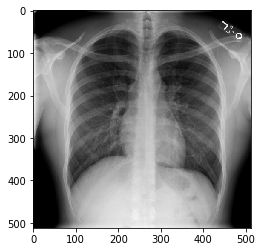


Etapa Concluída. Vá para o próximo comando!


In [0]:
ID_arquivo = 301

imagem = cv2.imread(normal_lista[ID_arquivo])

plt.imshow(imagem)
plt.show()

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')


#Execute esse código com SHIFT + ENTER

# **Como o computador enxerga uma imagem?**

Considere cada imagem como uma matriz em que o valor de cada pixel corresponde a um 
número que determina o tom de cinza da imagem.

![alt text](http://www.tecnologiaradiologica.com/Matriz&Pixel.jpg)


Portanto, para enxergar os contornos de uma imagem nosso algoritmo vai tentar criar filtros que representem estes contornos, como no exemplo abaixo.

![alt text](http://fastml.com/images/deep-learning-made-easy/layer2visualization.png)



# Criando os Lables e transformando nossas imagens em matrizes (números)

Precisamos informar explicitamente a qual das categorias as imagens pertecem em uma lista chamada labels (derrame = 1, normal = 0)

Faremos isso ao mesmo tempo que salvaremos as imagens numa matriz, pois como as redes neurais tem entrada de tamanho fixo, precisaremos redimensionar todas as imagens para um tamanho único que deve ser exatamente o mesmo da primeira camada da nossa rede neural (Input Layer), imagine que cada pixel será transformado em um número que vai entrar em cada neuronio da primeira camada, neste caso utilizaremos um tamanho de 256 x 256 pixels.

Para usar matrizes, importaremos NumPy, 

In [0]:
#Para usar matrizes, importaremos a NumPy.

# Por que usamos matrizes? A entrada de informações nas redes neurais se dá nesse formato,
# pois permite processamento computacional paralelo e maior velocidade de processamento.

import numpy as np

dataset = [] # cria uma lista vazia para incluir as imagens do dataset
labels = [] # cria uma lista vazia para incluir a categoria a qual cada imagem pertence (0 ou 1)

for arquivo in derrame_lista: # para cada arquivo de imagem na lista derrame:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) #abre o arquivo como escala de cinzas e coloca a imagem na variável img
    img = cv2.resize(img, (128,128)) #redimensiona a imagem para 256 x 256 e salva na mesma variável img
    dataset.append(img) #adiciona essa imagem na lista do dataset e 
    labels.append(1) #informa que ela é um caso de derrrame (1)

#Agora faremos o mesmo para as imagens sem derrame

for arquivo in normal_lista:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (128,128)) 
    dataset.append(img)
    labels.append(0) #mas agora informaremos que ela é um caso normal (0)
    
dataset = np.asarray(dataset, dtype=np.float32) #transforma a lista de variáveis numa matriz
labels = np.asarray(labels)

for i in range(len(dataset)):
  dataset[i] = (dataset[i] - np.average(dataset[i], axis= (0, 1))) / np.std(dataset[i], axis= (0, 1))
  #normalizando pela media e desvio padrão

print(dataset.shape)

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')


#Vamos ver qual o tamanho dessa matriz 'dataset'
#Esperamos que a primeira dimensão dela seja de 700 (350 casos de derrame e 350 normais)
#A segunda e a terceira dimensões devem ser 256.

# a saída esperada é (1000, 256, 256)

(1000, 128, 128)

Etapa Concluída. Vá para o próximo comando!


# Passo 2: Dividindo o dataset nos grupos Treinamento/Validação/Teste

In [0]:
#Vamos separar nosso dataset em grupos de treinamento, validação e test. Para isso, usaremos a biblioteca sklearn.

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#Divide treino, validação e teste na proporção 80%/10%/10%

dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset[:,...,np.newaxis], labels[:,...,np.newaxis], test_size=0.1, random_state=88)
dataset_train, dataset_val, labels_train, labels_val = train_test_split(dataset_train, labels_train, test_size=0.111, random_state=88)

#Mostra o tamanho das variáveis dos grupos

print('(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)')
print(dataset_train.shape, labels_train.shape)
print(dataset_val.shape, labels_val.shape)
print(dataset_test.shape, labels_test.shape)

#Você deve ver a seguinte saída:

#(800, 256, 256, 1) (800,1)
#(100, 256, 256, 1) (100,1)
#(100, 256, 256, 1) (100,1)

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)
(800, 128, 128, 1) (800, 1)
(100, 128, 128, 1) (100, 1)
(100, 128, 128, 1) (100, 1)

Etapa Concluída. Vá para o próximo comando!


# Passo 3: criando a estrutura da rede neural convolucional

** O que é uma convolução **

Uma convolução é uma operação matemátca que consiste em multiplicar uma matriz (a nossa imagem) por um filtro (matrix de pesos)



---




Lemba-se de como o computador enxerga um contorno?
Através de uma matriz de números estratégicamente orientados:


![alt text](https://cdn-images-1.medium.com/max/1600/1*7S266Kq-UCExS25iX_I_AQ.png)



---



Vamos utilizar esses filtros núméricos para enxergar os contornos ao longo de toda a imagem.

![alt text](https://camo.githubusercontent.com/5b29af1e1c0063e303ee3b2ae216c9d609daa405/68747470733a2f2f6c656f6e6172646f617261756a6f73616e746f732e676974626f6f6b732e696f2f6172746966696369616c2d696e74656c6967656e63652f636f6e74656e742f6d6f72655f696d616765732f436f6e766f6c7574696f6e5f736368656d617469632e676966)



E repetiremos essa operação várias vezes para nossa rede enxergar características cada vez mais complexas

A imagem abaixo representa mais ou menos a arquitetura da rede que vamos construir


![alt text](https://camo.githubusercontent.com/9e6e118e373b1ca1b8b53c8a70d4baf08840d768/68747470733a2f2f7777772e6d617468776f726b732e636f6d2f636f6e74656e742f6d617468776f726b732f7777772f656e2f646973636f766572792f636f6e766f6c7574696f6e616c2d6e657572616c2d6e6574776f726b2f6a63723a636f6e74656e742f6d61696e5061727379732f696d6167655f636f70792e61646170742e66756c6c2e686967682e6a70672f313439373837363337323939332e6a7067)


In [0]:
#Para criar a rede neural convolucional, utilizaremos o Keras, que é uma biblioteca para Deep Learning em Python
#Inicialmente vamos importar as funções do Keras que iremos utilizar:

from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Concatenate, add
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, Dense, LeakyReLU
from keras.utils.np_utils import to_categorical

#Agora criaremos a estrutura da rede neural convolucional

#A primeira define o tamanho da camada de entrada da rede
#Lembre que a nossa matriz com todas as imagens de cada categoria tem o formato (556, 256, 256)
#Nesse caso a entrada (input) da rede é cada imagem individualmente
#Ou seja, uma imagem de tamanho 256 x 256 pixels e 1 canal de cor (escala de cinzas)

imgs = Input(shape=(128,128,1))


#Abaixo vamos adicionar a primeira camada convolucional

x = Conv2D(8, 3, padding='same', activation='relu')(imgs)

#Em seguida, adicionamos uma camada MaxPool, que irá reduzir em 75% o tamanho da saída da camada convolucional.
#Fazemos isso para evitar que o número de parâmetros da rede aumente demais.
#Não se preocupe em entender o detalhe de cada uma dessas operações. Tente captar a ideia geral.

x = MaxPool2D()(x)

#Adicionaremos mais camadas convolucionais, seguidas de MaxPool

x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)

x = GlobalAveragePooling2D()(x)

#Finalmente adicionaremos duas camadas densas, ou 'Fully Connected Layers'.
#Essas camadas são redes neurais convencionais, sem convolução.
#Não se preocupe com o porquê de usarmos essa camada agora.
x = Dense(64, activation='relu')(x)

#Dropout é uma maneira de reduzir overfitting.
x = Dropout(0.25)(x)

#Definiremos agora a entrada e a saída da rede
#A função Dense tem o argumento "1" pois a saída da rede é a classificação hematoma x não-hematoma
#Ou seja, a saída da rede é apenas um número (0 ou 1)

x = Dense(32, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

inputs = imgs

#Por fim, definimos a rede

RadEinstein_CNN = Model(inputs=inputs, outputs=outputs)

#Agora, definiremos o método de otimização da rede: ADAM, com a taxa de aprendizado e de decaimento
#Cada um desses parâmetros é ajustável.

custom_adam = optimizers.Adam(lr=0.0005, decay=0.0004)

#Compila o modelo
RadEinstein_CNN.compile(loss='binary_crossentropy', optimizer=custom_adam, metrics=['acc'])

print ('\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

Etapa Concluída. Vá para o próximo comando!


# Data Augmentation

Nós temos um dataset pequeno, o que eleva a chance de overfiting do nosso modelo, ou seja, nosso modelo fica muito especializado apenes Rx de tórax que apresentamos, não conseguindo generalizar para os mais variados Rx de tórax do mundo real, com posições diferentes, etc...

Para tentar aumentar artificialmente o número de exemplos, vamos utilizar uma técnica chamada Data Augmentation, que levemente roda e muda a posição da imagem aleatóriamente antes de apresentar para a rede neural. 

![alt text](https://www.researchgate.net/publication/319413978/figure/fig2/AS:533727585333249@1504261980375/Data-augmentation-using-semantic-preserving-transformation-for-SBIR.png)

In [0]:
#Vamos importar as função do Keras que faz data augmentation:

from keras.preprocessing.image import ImageDataGenerator

#Aqui podemos definir diferentes variáveis que vão definir como as imagens  
#vão mudar em rotação, "corte" ou zoom.

datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.25,
    height_shift_range=0.25,
    zoom_range=0.15,
    horizontal_flip=True)

# Passo 4: Treinando a sua rede neural

Durante o treinamento da rede, os pesos das sinapses de todas as camadas são atualizados.

Após a conclusão do treinamento, cada filtro representará uma característica de imagem a ser procurada nas imagens do nosso dataset.

Procure na linha "hist" que definimos alguns hyperparameters, como por exemplo o número de epochs para 100, que significa por quantas repetições (épocas) faremos o treinamento.

Com estes parâmetros, deverá levar entre 5 e 10 minutos para treinar seu modelo.

Treinando a Rede RadEinstein_CNN:
Epoch 1/40
40/40 [==============================] - 7s 169ms/step - loss: 0.6929 - acc: 0.5062 - val_loss: 0.6925 - val_acc: 0.5100

Epoch 00001: val_loss improved from inf to 0.69246, saving model to Melhor_modelo.hdf5
Epoch 2/40
40/40 [==============================] - 7s 164ms/step - loss: 0.6922 - acc: 0.5062 - val_loss: 0.6821 - val_acc: 0.5100

Epoch 00002: val_loss improved from 0.69246 to 0.68213, saving model to Melhor_modelo.hdf5
Epoch 3/40
40/40 [==============================] - 7s 164ms/step - loss: 0.6806 - acc: 0.5619 - val_loss: 0.6666 - val_acc: 0.5300

Epoch 00003: val_loss improved from 0.68213 to 0.66663, saving model to Melhor_modelo.hdf5
Epoch 4/40
40/40 [==============================] - 7s 164ms/step - loss: 0.6755 - acc: 0.5987 - val_loss: 0.6489 - val_acc: 0.7000

Epoch 00004: val_loss improved from 0.66663 to 0.64887, saving model to Melhor_modelo.hdf5
Epoch 5/40
40/40 [==============================] - 7s 163ms/step - loss: 

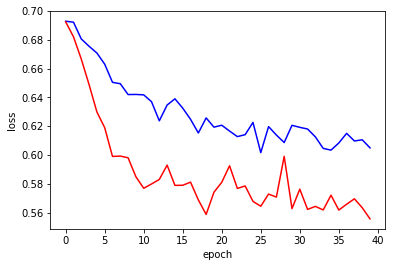

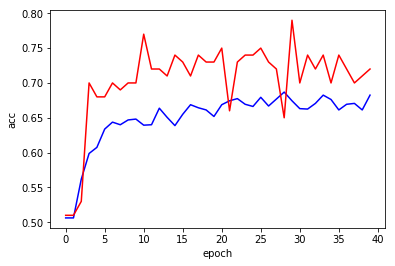

Treino finalizado.

Agora vamos avaliar o modelo no dataset de teste. Vá para a próximo comando.


In [0]:
#Primeiro vamos definir para salvar o melhor modelo que for encontrado durante o treino

checkpointer = ModelCheckpoint(filepath='Melhor_modelo.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)


print('Treinando a Rede RadEinstein_CNN:')
  

#Definimos o treinamento com o dataset de treino, realizando validação no dataset de validação.
#O treinamento não usa o dataset de teste, ficará guardado para avaliarmos nossa rede depois.

Valida = (dataset_val, labels_val)

#Muito bem, chegou a hora mais esperada, vamos treinar a nossa rede com o dataset que criamos

hist = RadEinstein_CNN.fit_generator(datagen.flow(dataset_train, labels_train, batch_size=40), steps_per_epoch=1*len(dataset_train) / 20, epochs=40, 
                    validation_data= (dataset_val, labels_val), 
                    callbacks=[checkpointer])

#Por fim, plotamos os resultados de evolução da medida de erro (loss) ao longo dos epochs

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

del(RadEinstein_CNN)
print('Treino finalizado.')

print ('\n' + '\033[1m' + 'Agora vamos avaliar o modelo no dataset de teste. Vá para a próximo comando.')

#Execute esse código com SHIFT + ENTER

O que estamos fazendo agora é basicamente tentando achar a menor diferença entre o que o algoritmo prediz e a resposta correta, esta diferença é chamada de perda (loss), quanto menor a perda (loss), mais o seu algoritmo esta acertando, consequentemente maior é a acurácia (acc).

Veja no gráfico abaixo que a rede neural está buscando o ponto de menor perda (loss) (azul mais escuro), mas para chegar lá ela pode tenta fazer vários caminhos diferentes de forma aleatória, por isso precisamos repetir o processo várias vezes, até ela achar o melhor caminho e chegar no ponto mais baixo (global minima).

![alt text](https://raw.githubusercontent.com/quinnliu/MachineLearning/master/imagesForExplanation/GradientDescentWithMutlipleLocalMinimum.jpg)

# Passo 5: avaliando sua rede no dataset de Teste

Neste passo, iremos apresentar todo o dataset de teste para o modelo que criamos, de forma a calcular a acurácia da nossa rede neural num grupo de imagens que o modelo nunca viu antes.

In [0]:
#Vamos importar a biblioteca do keras que abre modelos salvos previamente
from keras.models import load_model

#Agora abrimos o melhor modelo que geramos anteriormente

melhor_modelo = load_model('Melhor_modelo.hdf5')

print ('\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER

Etapa Concluída. Vá para o próximo comando!


In [0]:
#Usamos a função evaluate para avaliar a acurácia do nosso modelo no grupo de teste
print('Acurácia no grupo de teste: ', melhor_modelo.evaluate(dataset_test, labels_test, verbose=0)[1])

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER

Acurácia no grupo de teste:  0.68

Etapa Concluída. Vá para o próximo comando!


**Podemos ver a predição caso a caso**



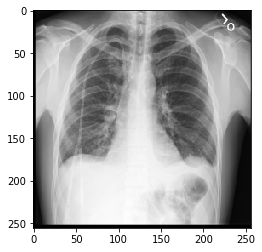

Classe: derrame
Predição: normal
Tempo médio de predição:
1000 loops, best of 3: 1.81 ms per loop

Etapa Concluída. Repita a operação procurando Quando satisfeito vá para o próximo comando!


In [0]:
#Agora vemos fazer a inferência em imagens individuais do nosso dataset de teste.

#Defina uma imagem no grupo de Teste, de 0 a 69:

ID_imagem = 20

#Agora vamos criar uma figura com a imagem escolhemos

plt.imshow(np.squeeze(dataset_test[ID_imagem]), cmap='gray')
plt.show()

#Vamos mostrar a qual classe ela pertence

print('Classe:', 'normal' if labels_test[ID_imagem]==0 else 'derrame')

predicao = np.round(melhor_modelo.predict(dataset_test[ID_imagem][np.newaxis,:,...], verbose=0))==0

print('Predição:', 'normal' if predicao else 'derrame')

#Calcula o tempo médio de predição
print('Tempo médio de predição:')
%timeit melhor_modelo.predict(dataset_test[ID_imagem][np.newaxis,:,...], verbose=0)

print ('\n' + '\033[1m' + 'Etapa Concluída. Repita a operação procurando Quando satisfeito vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER